[ Info: Precompiling IJuliaExt [2f4121a4-3b3a-5ce6-9c5e-1f2673ce168a] (cache misses: wrong dep version loaded (4))


Average SNR: 3.0006325


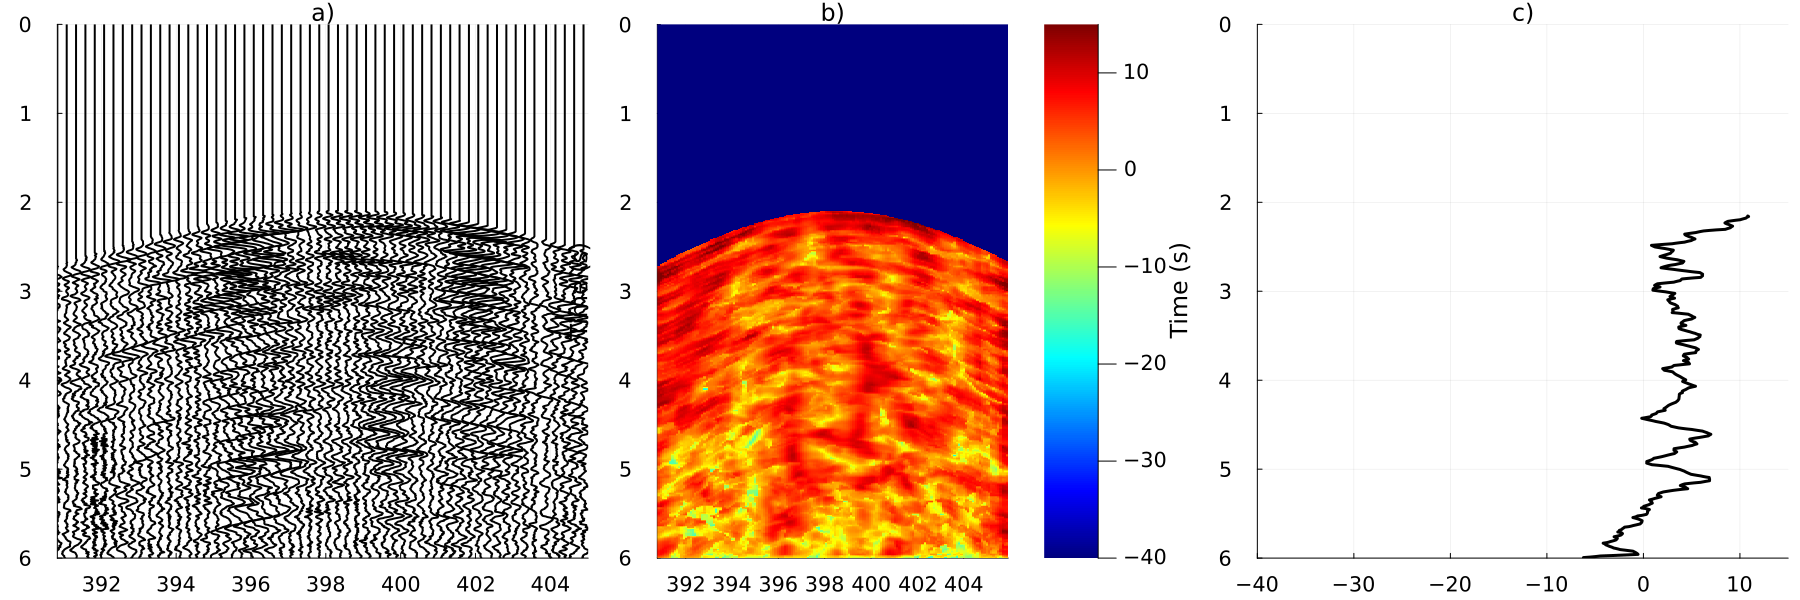

In [1]:
using Plots, Colors

# Parameters
nt = 1001
nd = 1131
np = 153
dt = 0.006
t = 0:dt:(nt-1)*dt

# Read binary data files
function read_binary_float32(filename, dims)
    open(filename, "r") do file
        data = Array{Float32}(undef, dims...)
        read!(file, data)
        return data
    end
end

# Read data files (note: fig8 instead of fig7)
data = read_binary_float32("data_fig8.bin", (nt, nd))
SNR_sembl3 = read_binary_float32("snr_fig8.bin", (nt, np))
x = read_binary_float32("x_fig8.bin", (nd,))

# Create xp array
xp = x[1]:99/1000:x[1]+99/1000*(np-1)

# Create figure with subplots
plot_width = 1800
plot_height = 600

# Normalize data
data = data / maximum(data)

# First subplot - Seismic traces
p1 = plot(size=(plot_width÷3, plot_height), 
          title="a)", 
          xlabel="X_rec (Km)", 
          ylabel="Time (s)",
          guidefontsize=16,
          titlefontsize=16,
          tickfontsize=14)

# Plot every 20th trace (note: 0.5 scaling instead of 2.5)
for i in 1:20:nd
    plot!(p1, data[:, i] * 0.5 .+ x[i], t, 
          color=:black, linewidth=2, label="")
end

plot!(p1, xlims=(minimum(x), maximum(x)), 
      ylims=(0, maximum(t)),
      yflip=true)  # axis ij equivalent

# Second subplot - SNR semblance
p2 = heatmap(collect(xp), collect(t), SNR_sembl3, 
             clims=(-40, 15),
             color=:jet,
             size=(plot_width÷3, plot_height),
             title="b)",
             xlabel="X_rec (Km)",
             ylabel="Time (s)",
             guidefontsize=16,
             titlefontsize=16,
             tickfontsize=14,
             yflip=true,
             aspect_ratio=:auto)

# Third subplot - 1D SNR profile
SNR1d = sum(SNR_sembl3[:, 61:100], dims=2)[:] / 40

p3 = plot(SNR1d[360:nt], t[360:nt],
          color=:black, linewidth=3,
          size=(plot_width÷3, plot_height),
          title="c)",
          xlabel="SNR (dB)",
          ylabel="Time (s)",
          xlims=(-40, 15),
          ylims=(0, maximum(t)),
          yflip=true,
          guidefontsize=16,
          titlefontsize=16,
          tickfontsize=14,
          label="")

# Combine all subplots
final_plot = plot(p1, p2, p3, layout=(1, 3), size=(plot_width, plot_height))

# Calculate and display average SNR
avg_SNR = sum(SNR1d[360:nt]) / (nt - 360 + 1)
println("Average SNR: ", avg_SNR)

# Display the plot
display(final_plot)